In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


df = pd.read_csv("Fertilizer Prediction.csv")


df.rename(columns={"Temparature": "Temperature"}, inplace=True)


label_encoders = {}
for col in ['Soil Type', 'Crop Type', 'Fertilizer Name']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(" Model Accuracy:", round(accuracy * 100, 2), "%")
print("\n Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 95.0 %

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


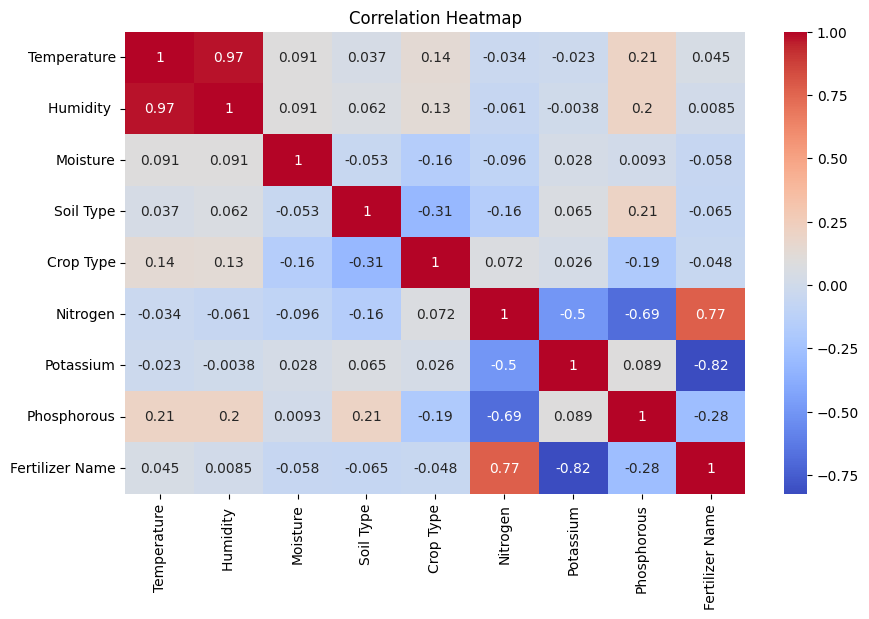

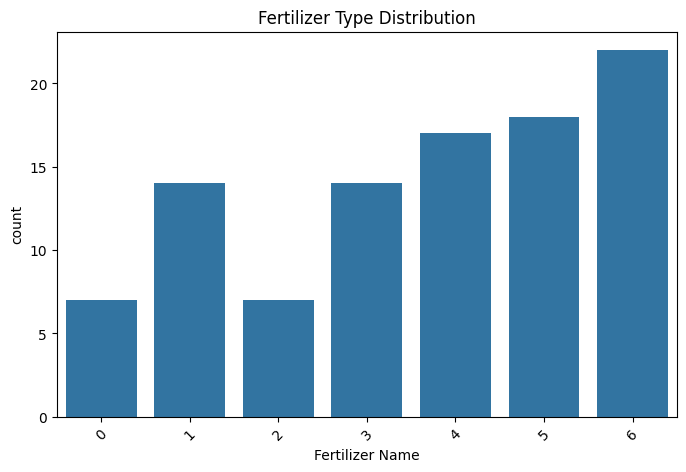

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Fertilizer distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Fertilizer Name', data=df)
plt.title("Fertilizer Type Distribution")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np


model = RandomForestClassifier(n_estimators=100, random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')


print("Cross-Validation Accuracy Scores:", cv_scores)
print(" Mean CV Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))
print("Standard Deviation: {:.2f}".format(np.std(cv_scores)))


Cross-Validation Accuracy Scores: [1.  1.  0.9 1.  1. ]
 Mean CV Accuracy: 98.00%
Standard Deviation: 0.04


In [ ]:

soil_encoded = label_encoders['Soil Type'].transform(['Clayey'])[0]
crop_encoded = label_encoders['Crop Type'].transform(['Sugarcane'])[0]


sample = [[28, 70, 50, soil_encoded, crop_encoded, 30, 25, 35]]
model.fit(X, y)

predicted_label = model.predict(sample)[0]


fertilizer_name = label_encoders['Fertilizer Name'].inverse_transform([predicted_label])[0]
print(" Recommended Fertilizer:", fertilizer_name)


 Recommended Fertilizer: Urea


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
import pickle

pickle.dump(model, open("fertilizer_model.pkl", "wb"))
pickle.dump(label_encoders, open("label_encoders.pkl", "wb"))
